# Operaciones Geométricas

Sea $A \in {\rm I\!R}^{mxn}$ la representación en formato "double" de una imagen. Sea $A(x, y)$ la entrada $(x, y)$ de la imagen $A$. Deseamos modificar el orden de las entradas $(x, y)$ de $A$, para obtener una nueva imagen $B$, tal que

\begin{gather*}
A(x, y) = B(x', y')
\end{gather*}

El cambiar la entrada $A(x, y)$ de la posición $(x', y')$ se realiza a partir de una transformación

\begin{gather*}
(x', y') = T(x, y) = (T_{x}(x, y), T_{y}(x, y))
\end{gather*}

donde $T$ es la transformación compuesta por dos sub-transformaciones $T_{x}$ y $T_{y}$. Nosotros veremos un conjunto de trabsformaciones lineales (llamadas afines), de la forma

\begin{gather*}
x' = T_{x}(x, y) = a_{0}x + a_{1}y + a_{2}
\end{gather*}

\begin{gather*}
y' = T_{y}(x, y) = b_{0}x + b_{1}y + b_{2}
\end{gather*}

Las ecuaciones anteriores se pueden representar como

\begin{gather*}
\begin{bmatrix}
x' \newline
y' \newline
1 \newline
\end{bmatrix} =
\begin{bmatrix}
a_{0} & a_{1} & a_{2} \newline
b_{0} & b_{1} & b_{2} \newline
0 & 0 & 1 \newline
\end{bmatrix}
\begin{bmatrix}
x \newline
y \newline
1 \newline
\end{bmatrix}
\end{gather*}

Tabla de Transformaciones en Octave

\begin{array}{|c|c|c|c|c|c|c|} \hline
\hspace{0cm} & a_{0} & a_{1} & a_{2} & b_{0} & b_{1} & b_{2} \\\hline
Traslación \Delta_{x}, \Delta_{y} & 1 & 0 & \Delta_{x} & 0 & 1 & \Delta_{y} \\\hline
Escalar [S_{x}, S_{y}] & S_{x} & 0 & 0 & 0 & S_{y} & 0 \\\hline
Rotar \theta & cos(\theta) & sen(\theta) & 0 & -sen(\theta) & cos(\theta) & 0 \\\hline
\end{array}

Nota: para rotar una imagen desde el centro, se debe utilizar la siguiente transformación

\begin{gather*}
x' = a_{0}(x - x_{c}) + a_{1}(y - y_{c}) + x_{c}
\end{gather*}

\begin{gather*}
y' = b_{0}(x - x_{c}) + b_{1}(y - y_{c}) + y_{c}
\end{gather*}

donde $(x_{c}, y_{c})$ es el centro imagen.

## Rotación con el método de Octave

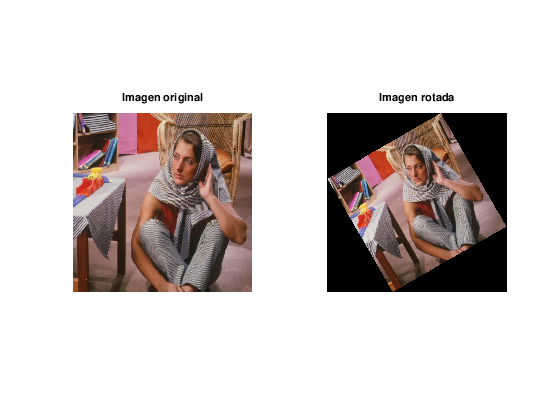

In [1]:
pkg load image;

A = imread('media/barbara.jpg');

% Rotar de la imagen A
angulo = 30; %angulo de rotacion

% cosd(x) es en grados, cos(x) es en radianes
a0 = cosd(angulo); a1 = sind(angulo); a2 = 0;
b0 = -sind(angulo); b1 = cosd(angulo); b2 = 0;

T = [a0 a1 a2; b0 b1 b2; 0 0 1];
Tr = maketform('affine', T');  % Crear la transformacion

B = imtransform(A, Tr); % Crea la imagen con la transformacion aplicada

subplot(1, 2, 1);
imshow(A);
title("Imagen original")
subplot(1, 2, 2);
imshow(B);
title("Imagen rotada")

## Rotación con un método implementado manualmente

In [2]:
function Y = rotar(A, angulo)
  % A es la matriz que representa la imagen (8 bytes)
  % Angulo debe estar en grados
  % Y es la imagen rotada
  a0 = cosd(angulo); a1 = sind(angulo); a2 = 0;
  b0 = -sind(angulo); b1 = cosd(angulo); b2 = 0;
  
  % Centro
  [m, n, r] = size(A);
  xc = round(m / 2); yc = round(n / 2);
  
  Y = zeros(m, n, r);
  Y = uint8(Y);
  
  for x = 1:m
    for y = 1:n
      xnew = mod(round(a0*(x - xc) + a1 * (y - yc) + xc), m);
      ynew = mod(round(b0*(x - xc) + b1 * (y - yc) + yc), n);
      % Se redondea porque se trabaja con posiciones enteras
      % Se utiliza el modulo para trabajar los casos en los que
      % la posicion obtenida se sale de los limites de la imagen
      % Se suma uno porque en Octave las posiciones empiezan en uno
      xaux = round(a0*(x - xc) + a1 * (y - yc) + xc);
      yaux = round(b0*(x - xc) + b1 * (y - yc) + yc);
      if and(xnew == xaux, ynew == yaux)
        Y(xnew + 1, ynew + 1, :) = A(x, y, :);
      end
    endfor  
  endfor  
endfunction  

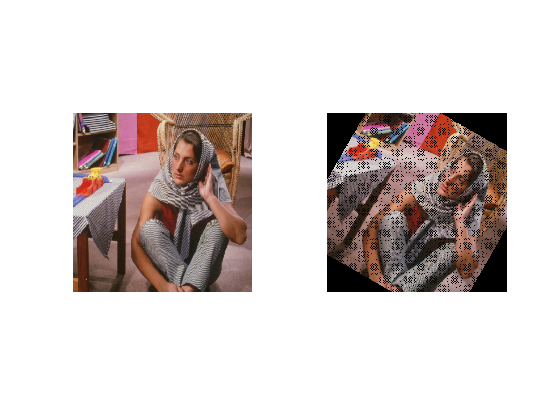

In [3]:
A = imread('media/barbara.jpg');

subplot(1, 2, 1);
imshow(A);
subplot(1, 2, 2);
B = rotar(A, 30);
imshow(B);